In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

sns.set_style('whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [3]:
# reading the dataset
df = pd.read_csv(r'../dataset/forest-cover-type-data.csv')
# standardizating the dataset columns
df.columns = df.columns.str.lower().str.replace(' ','_')
df.sample(5)

,id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,...,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
14859,14860,2541,200,8,90,8,2156,217,247,165,...,0,0,0,0,0,0,0,0,0,3
6666,6667,3055,75,7,90,0,2875,229,226,130,...,1,0,0,0,0,0,0,0,0,1
11666,11667,2951,339,6,283,40,3573,207,232,163,...,0,0,0,0,0,0,0,0,0,2
9608,9609,3649,7,11,1055,294,5248,206,217,148,...,0,0,0,0,0,0,0,0,1,7
8594,8595,2622,342,25,127,30,1624,161,195,167,...,0,0,0,0,0,0,0,0,0,6


In [4]:
df.describe()

,id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,...,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


in most machine learning frameworks, including Tensorflow and Keras, the labels for classification tasks are expected to start from and go up to n-1 (where n is the number of classes). This is known as zero-based indexing.

In [5]:
# splitting into independent and dependent classes
independent_variable = df.drop(columns='cover_type')
dependent_variable = df['cover_type'] - 1 # adjust labels to be zero-based for model compatibility

In [6]:
# splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(independent_variable, dependent_variable, test_size=0.2, random_state=42)

In [7]:
display(x_train.sample(2),x_test.sample(2))

,id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,...,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40
12115,12116,2826,199,19,90,37,1800,210,253,170,...,0,0,0,0,0,0,0,0,0,0
39,40,2686,354,12,0,0,3167,200,219,157,...,0,0,0,0,0,0,0,0,0,0


,id,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,...,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40
14879,14880,2580,193,3,127,14,582,219,242,159,...,0,0,0,0,0,0,0,0,0,0
828,829,2878,339,20,30,15,5493,175,208,170,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
display(x_train,x_test)

array([[-0.66027127, -0.93192165, -1.39353286, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-0.21218549,  0.31796942, -0.8590903 , ..., -0.22401411,
        -0.21279501, -0.17614271],
       [ 0.89370397,  0.53230526,  0.04674455, ..., -0.22401411,
        -0.21279501, -0.17614271],
       ...,
       [-0.49731015,  0.50822258, -0.03478058, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-1.53558564,  0.35409343,  0.88011261, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-0.06641436,  1.50042898, -0.71415672, ...,  4.46400444,
        -0.21279501, -0.17614271]])

array([[-0.33984983, -0.76815943, -0.08913067, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [ 0.07660637, -0.23593221, -0.38805617, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-0.16955431,  1.905018  ,  1.43267187, ..., -0.22401411,
        -0.21279501,  5.67721492],
       ...,
       [-1.19476541,  0.07955089, -0.62357323, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [ 1.11419426, -0.98249528,  0.24602822, ..., -0.22401411,
        -0.21279501, -0.17614271],
       [-0.90734875, -1.55807132, -0.02572223, ..., -0.22401411,
        -0.21279501, -0.17614271]])

In [10]:
# defining the model

model = Sequential(
    [
        Input(shape=(x_train.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(14, activation='relu'),
        Dense(7, activation='softmax')  # softmax for multiclass classification (7 classes)
    ]
)

In [11]:
# compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# train the model
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4038 - loss: 1.5150 - val_accuracy: 0.6248 - val_loss: 0.9096
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.5990 - loss: 0.9883 - val_accuracy: 0.6504 - val_loss: 0.8175
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.6428 - loss: 0.8619 - val_accuracy: 0.6719 - val_loss: 0.7656
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6578 - loss: 0.8194 - val_accuracy: 0.6934 - val_loss: 0.7356
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.6814 - loss: 0.7660 - val_accuracy: 0.7062 - val_loss: 0.7009
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.6821 - loss: 0.7534 - val_accuracy: 0.7074 - val_loss: 0.6800
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.6882 - loss: 0.7359 - val_accuracy: 0.7174 - val_loss: 0.6647
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.7012 - loss: 0.7032 - val_

In [13]:
# evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8105 - loss: 0.4783
Test Accuracy: 0.80
Test Loss: 0.48


In [14]:
# prediction
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       421
           1       0.71      0.59      0.65       438
           2       0.76      0.69      0.72       428
           3       0.90      0.97      0.93       449
           4       0.82      0.89      0.85       416
           5       0.75      0.79      0.77       432
           6       0.94      0.95      0.94       440

    accuracy                           0.80      3024
   macro avg       0.80      0.80      0.80      3024
weighted avg       0.80      0.80      0.80      3024



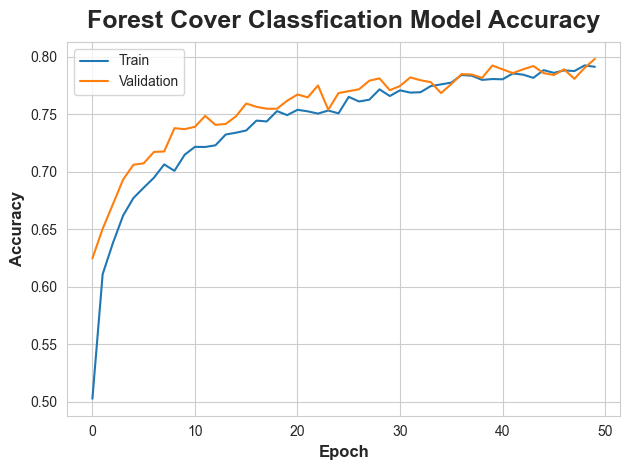

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Forest Cover Classfication Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc="upper left")
plt.show()

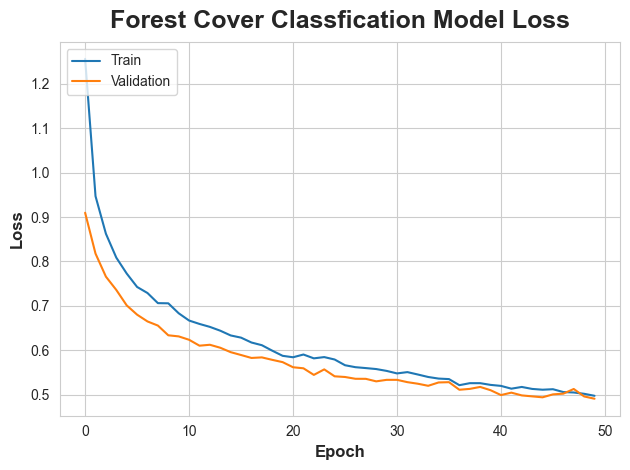

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Forest Cover Classfication Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc="upper left")
plt.show()

In [17]:
# defining the model

model_2 = Sequential(
    [
        Input(shape=(x_train.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(14, activation='relu'),
        Dense(7, activation='softmax')  # softmax for multiclass classification (7 classes)
    ]
)

In [18]:
# compile the model
model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
# train the model
history_2 = model_2.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3657 - loss: 1.5695 - val_accuracy: 0.6463 - val_loss: 0.8764
Epoch 2/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6099 - loss: 0.9447 - val_accuracy: 0.6702 - val_loss: 0.8042
Epoch 3/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6410 - loss: 0.8406 - val_accuracy: 0.6764 - val_loss: 0.7546
Epoch 4/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.6609 - loss: 0.8021 - val_accuracy: 0.6893 - val_loss: 0.7213
Epoch 5/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.6698 - loss: 0.7643 - val_accuracy: 0.7083 - val_loss: 0.6932
Epoch 6/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.6883 - loss: 0.7376 - val_accuracy: 0.7186 - val_loss: 0.6701
Epoch 7/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.6974 - loss: 0.7179 - val_accuracy: 0.7355 - val_loss: 0.6596
Epoch 8/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.7043 - loss: 0.6914 

In [20]:
# evaluate the model on test data
test_loss_2, test_accuracy_2 = model_2.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy_2:.2f}")
print(f"Test Loss: {test_loss_2:.2f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8286 - loss: 0.4381
Test Accuracy: 0.83
Test Loss: 0.44


In [21]:
# prediction
y_pred_2 = np.argmax(model_2.predict(x_test), axis=1)
print(classification_report(y_test, y_pred_2))

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       421
           1       0.75      0.63      0.68       438
           2       0.79      0.72      0.75       428
           3       0.89      0.98      0.93       449
           4       0.85      0.93      0.89       416
           5       0.77      0.81      0.79       432
           6       0.96      0.96      0.96       440

    accuracy                           0.83      3024
   macro avg       0.82      0.83      0.82      3024
weighted avg       0.82      0.83      0.82      3024



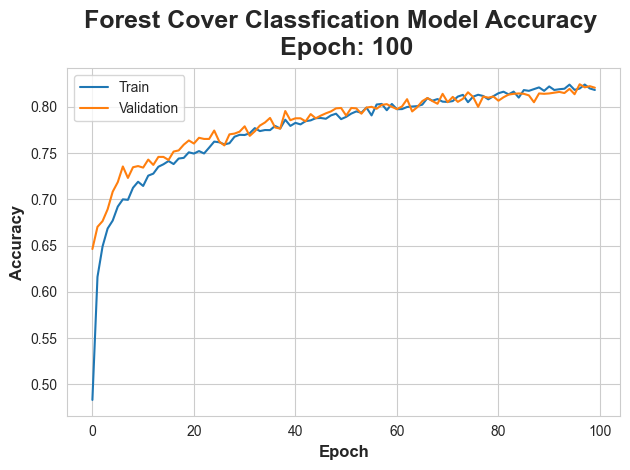

In [22]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title("Forest Cover Classfication Model Accuracy \n Epoch: 100")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc="upper left")
plt.show()

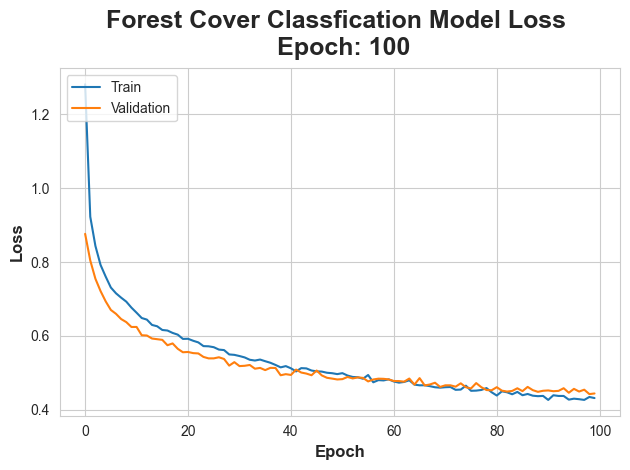

In [23]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title("Forest Cover Classfication Model Loss \n Epoch: 100")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc="upper left")
plt.show()

# Comparitive Analysis

In [24]:
print(f"Difference in accuracy: {test_accuracy - test_accuracy_2}")

Difference in accuracy: -0.02480161190032959


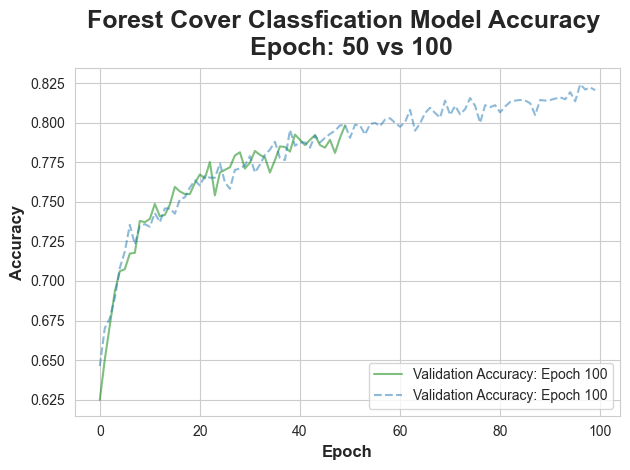

In [31]:
plt.plot(history.history['val_accuracy'], c='green', label="Validation Accuracy: Epoch 100", alpha=0.5)
plt.plot(history_2.history['val_accuracy'], label="Validation Accuracy: Epoch 100", alpha=0.5, linestyle="--")
plt.title("Forest Cover Classfication Model Accuracy \n Epoch: 50 vs 100")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

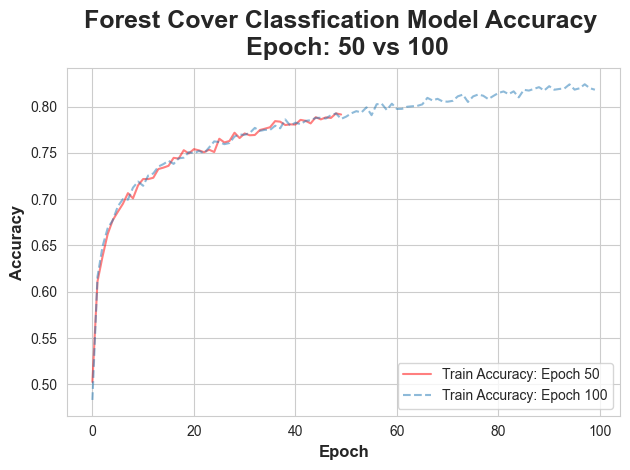

In [32]:
plt.plot(history.history['accuracy'], c='red', label="Train Accuracy: Epoch 50", alpha=0.5)
plt.plot(history_2.history['accuracy'], label="Train Accuracy: Epoch 100", alpha=0.5, linestyle="--")
plt.title("Forest Cover Classfication Model Accuracy \n Epoch: 50 vs 100")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

# Adding a layer

In [39]:
# defining the model
model_3 = Sequential(
    [
        Input(shape=(x_train.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(14, activation='relu'),
        Dense(7, activation='softmax')  # softmax for multiclass classification (7 classes)
    ]
)

In [27]:
# compile the model
model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
# train the model
history_3 = model_3.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2946 - loss: 1.7845 - val_accuracy: 0.6004 - val_loss: 1.0358
Epoch 2/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5545 - loss: 1.1017 - val_accuracy: 0.6603 - val_loss: 0.8632
Epoch 3/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6073 - loss: 0.9526 - val_accuracy: 0.6661 - val_loss: 0.7968
Epoch 4/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6363 - loss: 0.8743 - val_accuracy: 0.6942 - val_loss: 0.7541
Epoch 5/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.6433 - loss: 0.8466 - val_accuracy: 0.6950 - val_loss: 0.7268
Epoch 6/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6602 - loss: 0.7997 - val_accuracy: 0.7070 - val_loss: 0.7051
Epoch 7/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6779 - loss: 0.7780 - val_accuracy: 0.7120 - val_loss: 0.6946
Epoch 8/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6939 - loss: 0.7554 - val_ac

In [29]:
# evaluate the model on test data
test_loss_3, test_accuracy_3 = model_3.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy_3:.2f}")
print(f"Test Loss: {test_loss_3:.2f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.8268 - loss: 0.4412
Test Accuracy: 0.83
Test Loss: 0.45


In [30]:
print(f"Difference in accuracy: {test_accuracy_2 - test_accuracy_3}")

Difference in accuracy: 0.0009920597076416016


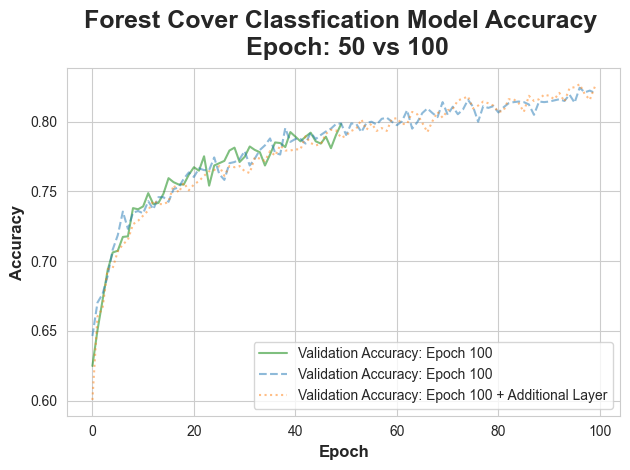

In [35]:
plt.plot(history.history['val_accuracy'], c='green', label="Validation Accuracy: Epoch 100", alpha=0.5)
plt.plot(history_2.history['val_accuracy'], label="Validation Accuracy: Epoch 100", alpha=0.5, linestyle="--")
plt.plot(history_3.history['val_accuracy'], label="Validation Accuracy: Epoch 100 + Additional Layer", alpha=0.5, linestyle=":")
plt.title("Forest Cover Classfication Model Accuracy \n Epoch: 50 vs 100")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

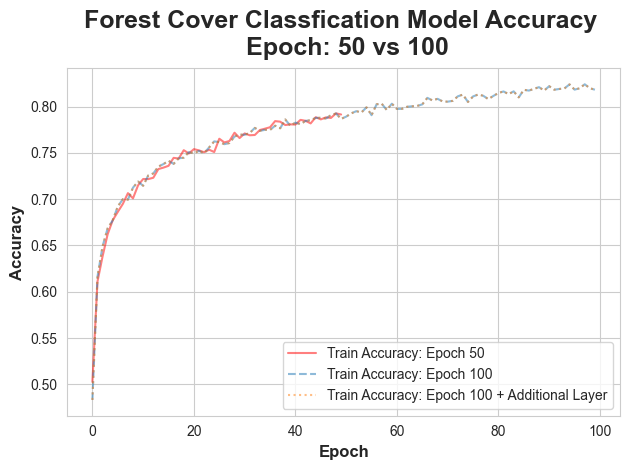

In [37]:
plt.plot(history.history['accuracy'], c='red', label="Train Accuracy: Epoch 50", alpha=0.5)
plt.plot(history_2.history['accuracy'], label="Train Accuracy: Epoch 100", alpha=0.5, linestyle="--")
plt.plot(history_2.history['accuracy'], label="Train Accuracy: Epoch 100 + Additional Layer", alpha=0.5, linestyle=":")
plt.title("Forest Cover Classfication Model Accuracy \n Epoch: 50 vs 100")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

# Using the same model using LeakyReLU

In [41]:
# defining the model
model_4 = Sequential(
    [
        Input(shape=(x_train.shape[1],)),
        Dense(128),
        LeakyReLU(alpha=0.01),
        Dropout(0.3),
        Dense(64),
        LeakyReLU(alpha=0.01),
        Dropout(0.3),
        Dense(32),
        LeakyReLU(alpha=0.01),
        Dropout(0.3),
        Dense(14),
        LeakyReLU(alpha=0.01),
        Dense(7, activation='softmax')  # softmax for multiclass classification (7 classes)
    ]
)

c:\Users\sayyed\anaconda3\envs\dl\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [42]:
# compile the model
model_4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [43]:
# train the model
history_4 = model_4.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3424 - loss: 1.6636 - val_accuracy: 0.6161 - val_loss: 0.9272
Epoch 2/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5567 - loss: 1.0461 - val_accuracy: 0.6533 - val_loss: 0.8350
Epoch 3/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6109 - loss: 0.9267 - val_accuracy: 0.6707 - val_loss: 0.7950
Epoch 4/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6539 - loss: 0.8628 - val_accuracy: 0.6860 - val_loss: 0.7406
Epoch 5/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6652 - loss: 0.8161 - val_accuracy: 0.6959 - val_loss: 0.7205
Epoch 6/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6793 - loss: 0.7856 - val_accuracy: 0.7083 - val_loss: 0.6936
Epoch 7/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6769 - loss: 0.7687 - val_accuracy: 0.7178 - val_loss: 0.6802
Epoch 8/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6972 - loss: 0.7613 - val_accu

In [44]:
# evaluate the model on test data
test_loss_4, test_accuracy_4 = model_4.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy_4:.2f}")
print(f"Test Loss: {test_loss_4:.2f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8241 - loss: 0.4649
Test Accuracy: 0.82
Test Loss: 0.47


In [46]:
print(f"Difference in accuracy: {test_accuracy_3 - test_accuracy_4}")

Difference in accuracy: 0.001653432846069336


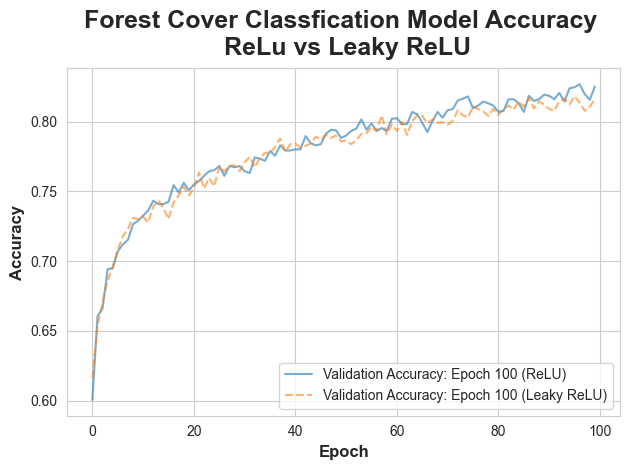

In [53]:
plt.plot(history_3.history['val_accuracy'], label="Validation Accuracy: Epoch 100 (ReLU)", alpha=0.6)
plt.plot(history_4.history['val_accuracy'], label="Validation Accuracy: Epoch 100 (Leaky ReLU)", alpha=0.6, linestyle='--')
plt.title("Forest Cover Classfication Model Accuracy \n ReLu vs Leaky ReLU")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()

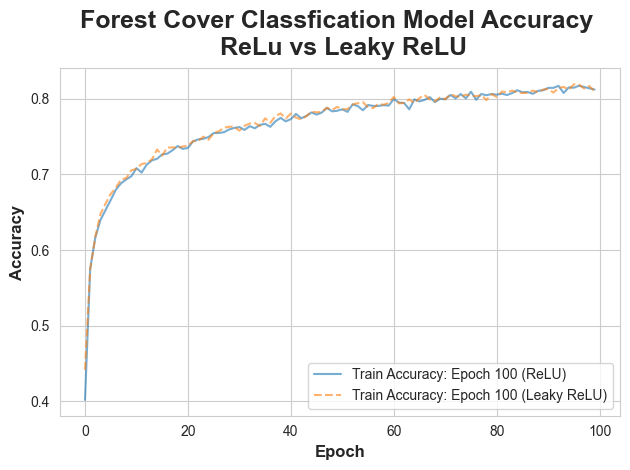

In [54]:
plt.plot(history_3.history['accuracy'], label="Train Accuracy: Epoch 100 (ReLU)", alpha=0.6)
plt.plot(history_4.history['accuracy'], label="Train Accuracy: Epoch 100 (Leaky ReLU)", alpha=0.6, linestyle="--")
plt.title("Forest Cover Classfication Model Accuracy \n ReLu vs Leaky ReLU")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()